In [38]:
#importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

El problema
Debemos encontrar el valor de x  que maximice el valor de y en la siguiente función.

In [39]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

In [40]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

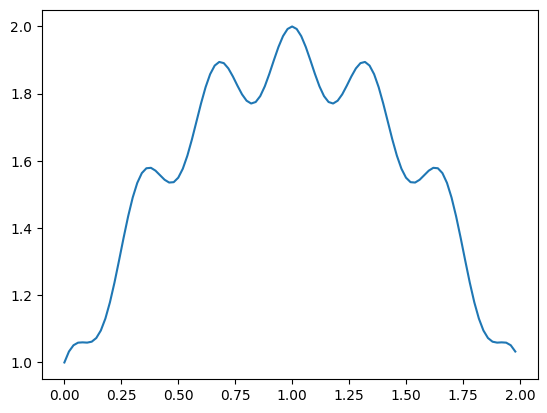

In [41]:
plt.plot(x_axis,y_axis)

Como se puede observar arriba, la función tiene varios máximos y mínimos locales. El objetivo es llegar al punto más alto que se encuentra en x=1.

Aquí realicé dos enfoques, uno donde los genes se representan mediante números decimales y otro donde se representan mediante código binario. Esto produce resultados interesantes, pero lo importante es entender los componentes principales del algoritmo genético. Así que avanzaré primero con el enfoque más obvio y luego pasaré al código binario.

Algoritmos genéticos
Representación de los genes
Primero, tenemos que planificar qué representan los genes de nuestros individuos. Los genes deben tener la capacidad de resolver el problema, aunque no lo hagan de forma inmediata; y su efectividad debe poder medirse con precisión.

In [42]:
#individuo de ejemplo 
x = 0.54
y = fx(x)

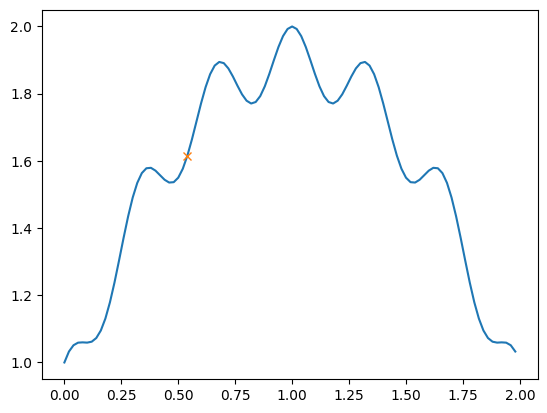

In [43]:
plt.plot(x_axis,y_axis)
plt.plot(x,y,'x')

In [44]:
#individuo de ejemplo 
#x = 0.54
x = [0,5,4]

Necesitamos representar los genes como una lista para poder realizar la mutación y el entrecruzamiento. Así que debemos manejar una función que convierta una lista en números decimales.

In [45]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

In [46]:
listToDecimal(x)

0.54

Para hacer esto más interesante me gustaría manejar individuos con un código genético más grande, así que voy a definir un ind_size con el cual generaré un primer código genético aleatorio.

In [47]:
ind_size = 15
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo

[1, 8, 6, 9, 0, 1, 1, 5, 7, 5, 8, 7, 1, 7, 1]

In [48]:

listToDecimal(individuo)

1.8690115758717103

Al convertir la lista en decimal podemos notar una pequeña variación al final debido a la forma en que python realiza la suma de punto flotante, pero nada de mucho peso.

In [49]:
poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]

[[0, 9, 7, 9, 0, 4, 7, 2, 3, 4, 0, 9, 9, 8, 8],
 [1, 5, 2, 4, 4, 2, 8, 3, 2, 9, 0, 7, 2, 5, 6],
 [1, 1, 4, 2, 8, 0, 3, 9, 0, 4, 6, 5, 6, 3, 2],
 [0, 8, 0, 6, 9, 4, 1, 1, 8, 4, 8, 5, 9, 5, 1],
 [0, 4, 1, 0, 0, 3, 5, 9, 5, 9, 7, 0, 6, 0, 3],
 [0, 7, 5, 4, 2, 9, 1, 6, 7, 3, 1, 6, 3, 3, 7],
 [1, 7, 0, 6, 7, 4, 8, 7, 1, 7, 6, 6, 0, 7, 4],
 [1, 7, 6, 5, 5, 1, 6, 2, 2, 3, 9, 6, 3, 3, 8],
 [0, 8, 1, 0, 2, 5, 9, 1, 3, 0, 1, 7, 7, 9, 8],
 [0, 1, 0, 4, 5, 4, 5, 6, 3, 1, 3, 8, 7, 7, 2]]

Finalmente, genero una población llena de individuos con genes aleatorios. De esta población vamos a elegir los mejores para reproducirlos.
Abajo observarás cómo se encuentra repartida la población.

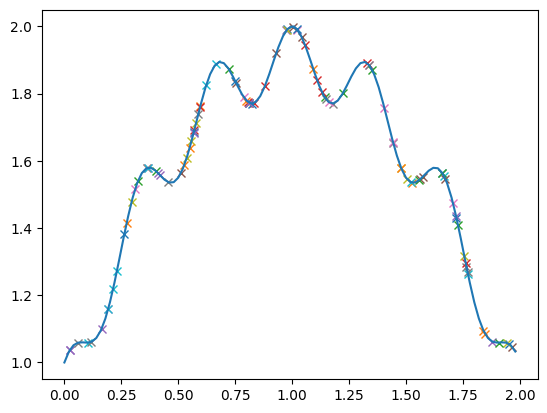

In [50]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Medición del éxito
Esto se suele llamar fitness. Aquí vamos a medir el éxito del individuo para cumplir con el objetivo y determinar la probabilidad que tendrá de reproducirse.
Ya que queremos maximizar una función, aquellos individuos que produzcan un valor más alto en 
 serán seleccionados como los mejores.

In [51]:
fitness =[]

#extraigo los valores de y para medir su éxito
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]
    
#convierto fitnees en un vector para realizar operaciones
#más fácilmente
fitness = np.array(fitness)

#divido todos los valores de y para la suma total
#y así obtener valores entre 0 y 1
fitness=fitness/fitness.sum()

In [52]:
fitness


array([0.01261055, 0.00972061, 0.01132972, 0.01123663, 0.00990432,
       0.01159558, 0.00932749, 0.00813634, 0.01122688, 0.00670605,
       0.00905365, 0.01126584, 0.00892408, 0.01122299, 0.0065704 ,
       0.00999667, 0.01259997, 0.00671434, 0.01050297, 0.01156717,
       0.00874715, 0.01186246, 0.009753  , 0.01143626, 0.00656411,
       0.00977899, 0.01193557, 0.00670459, 0.00833157, 0.00770955,
       0.00989775, 0.00895951, 0.01186002, 0.01070808, 0.01258898,
       0.01245642, 0.01000314, 0.01193811, 0.01000227, 0.00805936,
       0.0066843 , 0.01004358, 0.00994433, 0.01230691, 0.00696451,
       0.01265885, 0.01133587, 0.0104735 , 0.01084471, 0.00984999,
       0.01066559, 0.01116897, 0.00990093, 0.01166293, 0.00985423,
       0.00990346, 0.00960296, 0.00973323, 0.0097837 , 0.00799054,
       0.01120994, 0.00999607, 0.01140817, 0.01197316, 0.00909727,
       0.00983359, 0.0111199 , 0.0080313 , 0.01259264, 0.01000269,
       0.0112217 , 0.01037678, 0.01183848, 0.01114452, 0.01065

Todos los valores de y  se dividen entre la suma total para obtener una probabilidad. La operación realizada arriba sirve para representar porcentajes. Por ejemplo, si tengo dos números: [8,5], cuando los divido para la suma obtengo el porcentaje que representan del total:

In [53]:
array = np.array([8,5])
array = array/array.sum()
array

array([0.61538462, 0.38461538])

Si trabajo con números que sumen diez será más fácil visualizarlo.

In [54]:
array = np.array([8,2])
array = array/array.sum()
array

array([0.8, 0.2])

Los números más grandes producen un porcentaje mayor, y ya que la probabilidad se mide entre 0 y 1, esto ya nos permite darle una probabilidad mayor de reproducirse a los mejores individuos, aquellos que obtuvieron números más grandes en y.

El entrecruzamiento consiste en mezclar los genes de los mejores individuos. En este caso vamos a elegir dos padres al azar, de acuerdo a la probabilidad del fitness, para que produzcan un nuevo individuo.
Es importante no descartar de lleno a los peores individuos ya que, tal vez, su código genético puede servir para lograr algo mejor más tarde.
Luego, se elige un cross_point a partir del cual se van a combinar los genes de los padres. Se va a copiar los genes del primer padre hasta este punto, y luego los genes del otro padre.

In [55]:
size_poblacion = len(poblacion)
#hijos
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [56]:
offspring[:10]

[[0, 7, 5, 8, 6, 9, 2, 4, 8, 4, 1, 0, 9, 4, 9],
 [1, 1, 0, 4, 2, 9, 1, 6, 7, 3, 1, 6, 3, 3, 7],
 [0, 9, 7, 5, 6, 2, 4, 2, 4, 5, 3, 8, 0, 0, 4],
 [0, 5, 7, 8, 3, 9, 1, 8, 3, 5, 1, 5, 2, 7, 7],
 [1, 4, 0, 5, 5, 2, 3, 2, 1, 5, 2, 3, 7, 4, 2],
 [0, 5, 2, 5, 6, 1, 9, 5, 3, 0, 1, 5, 3, 9, 8],
 [0, 1, 0, 8, 6, 9, 2, 4, 8, 4, 1, 0, 9, 4, 9],
 [1, 9, 2, 9, 9, 8, 8, 3, 1, 8, 7, 0, 1, 9, 4],
 [1, 3, 3, 7, 6, 6, 3, 6, 0, 8, 6, 8, 9, 0, 2],
 [0, 9, 7, 4, 9, 7, 8, 7, 9, 0, 0, 3, 4, 3, 9]]

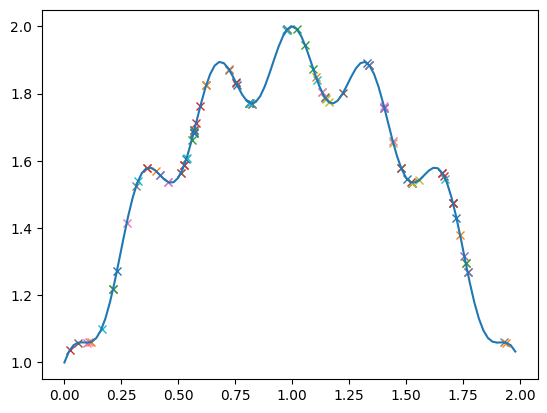

In [57]:
poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

En una sola generación podemos ver que los individuos ya se están concentrando en puntos más altos de la función. A medida que pasen las generaciones el objetivo es que todos los individuos convergan alrededor de 1.

Mutaciones
Otro aspecto interesante del algoritmo genético es la probabilidad de que se produzca una mutación en los individuos. Lo que significa que el ADN de cualquier individuo puede producir un gen que no viene de sus padres.
El individuo [0,5,3,8,9] puede mutar a [0,5,4,8,9] y esto mantiene la puerta abierta hacia el mejoramiento de la población.

In [58]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [59]:
mutate(poblacion,0.005,genetic_pool)
poblacion[:10]

[[0, 7, 5, 8, 6, 9, 2, 4, 8, 4, 1, 0, 9, 4, 9],
 [1, 1, 0, 4, 2, 9, 1, 6, 7, 3, 1, 6, 3, 3, 7],
 [0, 9, 7, 5, 6, 2, 4, 2, 4, 5, 3, 8, 0, 0, 4],
 [0, 5, 7, 8, 3, 9, 1, 8, 3, 5, 1, 5, 2, 7, 7],
 [1, 4, 9, 5, 5, 2, 3, 2, 1, 5, 2, 3, 7, 4, 2],
 [0, 5, 2, 5, 6, 1, 9, 5, 3, 0, 1, 5, 3, 9, 8],
 [0, 1, 0, 8, 6, 9, 2, 4, 8, 4, 1, 0, 9, 4, 9],
 [1, 9, 2, 9, 9, 8, 8, 3, 1, 8, 7, 0, 1, 9, 4],
 [1, 3, 3, 7, 6, 6, 3, 6, 0, 8, 6, 8, 9, 0, 2],
 [0, 9, 7, 4, 9, 7, 8, 7, 9, 0, 0, 3, 4, 3, 9]]

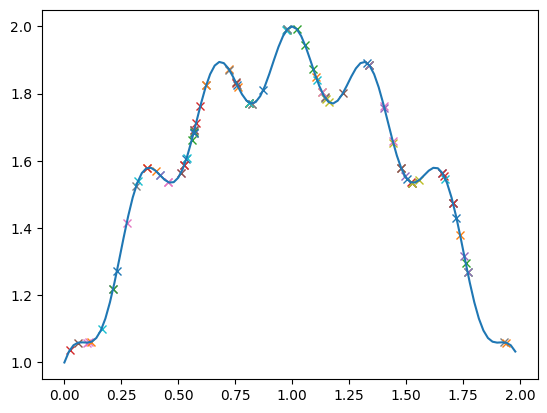

In [60]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

No hay un gran cambio debido a que la probabilidad de mutar es baja, pero así es como tiene que mantenerse, de lo contrario sería imposible llegar a una solución. La mutación debe ser muy poco frecuente.

In [61]:
generaciones = 100

for _ in range(generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    
        
    
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,0.005,genetic_pool)

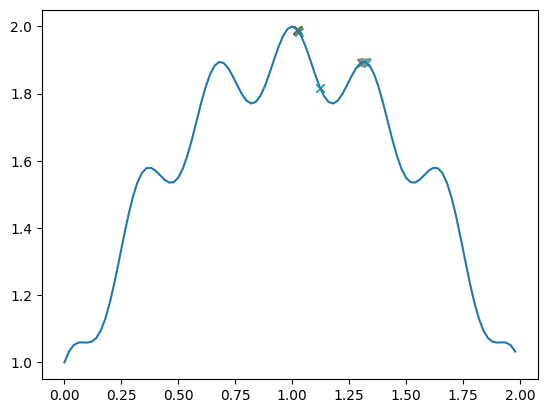

In [62]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

Después de 100 generaciones podemos ver que la mayoría de los individuos se concentran en el valor máximo. Y si vemos el mejor individuo vamos a ver que su valor es cercano a 1.

In [63]:
np.where(fitness == fitness.max())

(array([30], dtype=int64),)

In [64]:
listToDecimal(poblacion[41])

1.0226713170339896

In [65]:

fx(listToDecimal(poblacion[41]))


1.9904929757958918

Podríamos dejarlos reproducirse por unas cuántas generaciones más a ver si siguen avanzando hacia el máximo.

In [66]:
generaciones = 300

for _ in range(generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    
        
    
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,0.005,genetic_pool)
    

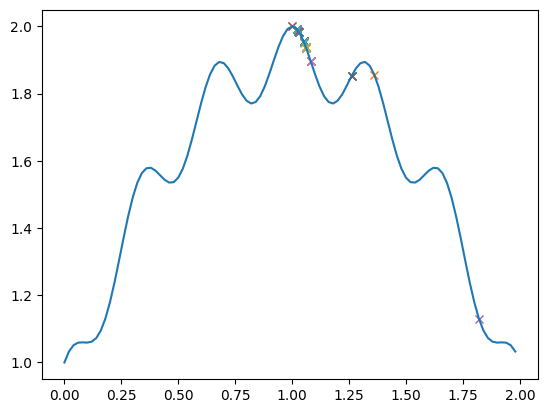

In [67]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [68]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

1.05327930636328

El mejor individuo sigue siendo sólo cercano a 1, pues su ADN no es muy estable y es imposible obtener el valor exacto de 1. Sin embargo, esto es posible con un ADN binario.

Individuos con ADN binario
Si hacemos que el ADN no represente números binarios, sino una división, entonces el individuo será mucho más estable. Como ya expliqué lo importante del algoritmo genético, no voy a detenerme mucho con este enfoque.

In [69]:
def bin_decimal(num_binario):
    return (np.sum(num_binario)/len(num_binario))*2

La función de arriba transforma una lista de números binarios en un número decimal que va desde 0 a 2. Cómo lo logra es bastante sencillo, suma todos los 1 del ADN y luego los divide para la longitud del ADN. Es muy similar al cálculo del fitness. Esto devuelve un número entre 0 y 1, si este número se multiplica por 2, ahora tenemos una forma de producir números entre 0 y 2.

In [78]:
#resultado de sumar todos los 1
individuo = [0,1,1,1,1,0]
bin_decimal(individuo)

1.3333333333333333

In [96]:
poblacion = []
genetic_pool = [0,1]
for i in range(100):
    individuo = list(np.random.choice(genetic_pool,15))
    poblacion.append(individuo)
poblacion[:10]

[[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

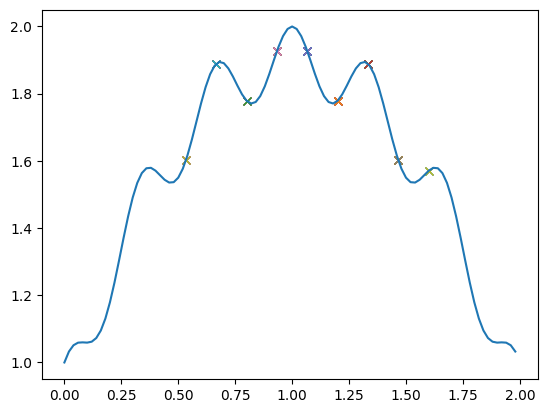

In [97]:
for individuo in poblacion:
    x = bin_decimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [98]:
fitness =[]

#extraigo los valores de y para medir su éxito
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]
    
#convierto fitnees en un vector para realizar operaciones
#más fácilmente
fitness = np.array(fitness)

#divido todos los valores de y para la suma total
#y así obtener valores entre 0 y 1
fitness=fitness/fitness.sum()

In [99]:
fitness

array([0.00708945, 0.00709036, 0.00708516, 0.01242369, 0.00708524,
       0.00669114, 0.0067045 , 0.01337961, 0.01336444, 0.01337961,
       0.00709027, 0.0067045 , 0.01242356, 0.00709036, 0.00668982,
       0.01229355, 0.00681229, 0.01336444, 0.00670306, 0.01242236,
       0.00682302, 0.00709027, 0.00708516, 0.01336417, 0.00709026,
       0.01337946, 0.00669114, 0.01337946, 0.01242236, 0.00682184,
       0.01230614, 0.00682184, 0.00708944, 0.00708936, 0.01336419,
       0.01243566, 0.01230726, 0.00709026, 0.01337961, 0.01336684,
       0.00682195, 0.01336684, 0.00708944, 0.01337961, 0.00708516,
       0.01230726, 0.01242224, 0.0067032 , 0.00708516, 0.01337961,
       0.00681218, 0.01242223, 0.00708516, 0.00681109, 0.0068112 ,
       0.00708945, 0.01230613, 0.01229479, 0.01243554, 0.01337961,
       0.00670438, 0.00708516, 0.01229367, 0.01242224, 0.01336681,
       0.00708516, 0.00668995, 0.01242224, 0.00708525, 0.01337961,
       0.00708517, 0.00682302, 0.01337961, 0.0122948 , 0.01243

In [106]:
size_poblacion = len(poblacion)
#hijos
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [107]:
offspring[:10]

[[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
 [1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]]

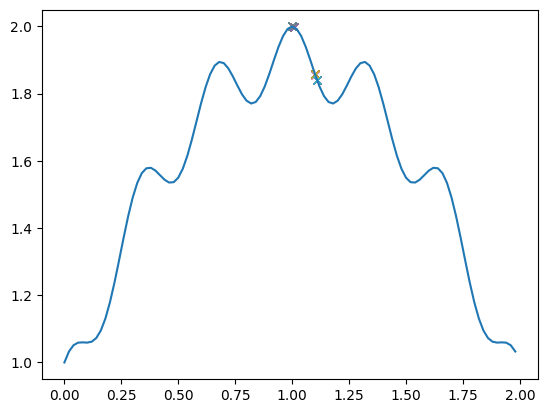

In [108]:
poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [111]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[1])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [112]:
generaciones = 100

for _ in range(generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()  
      # se reproducen los mejores individuos  
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
          
    mutate(poblacion,0.005,genetic_pool)


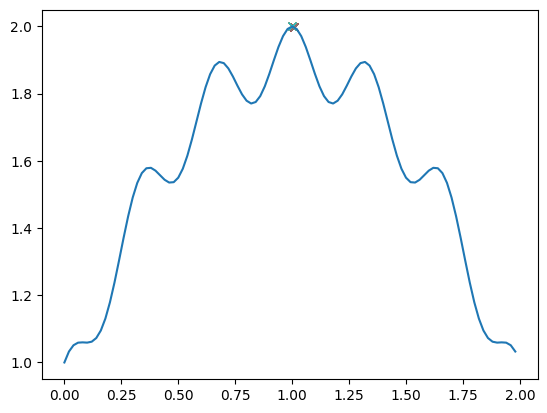

In [114]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [115]:
listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

1.0000100001010102